In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as pp

import os

def get_full_path_to_save_EDA(params):
    
    # get location of the table of analysis
    directory = '/Volumes/Seagate Bac/pre_epi_seizures/EDanalysis/'
    file_name = 'EDAanalysis_directories_table.h5'
    path = directory + file_name
    
    
    # Check wether the Parameters are already in disk
    if os.path.exists(path):
        print 'Table Exists!'
        full_path = check_EDA_table(params, directory, file_name)
        if not full_path:
            full_path = update_EDA_table(params, directory, file_name)
    else:
        print 'Not Exists!'
        full_path = make_new_EDA_table(params, directory, file_name)
        
    return full_path


def check_EDA_table(params, directory, file_name):
    # Try and load the path for the parameters
    table = load_table_from_disk(directory, file_name)
    print 'this is the table'
    print table
    full_path = get_path_for_params_in_table(params, directory, table)
    return full_path


def update_EDA_table(params, directory, EDA_table_file_name):
    table = load_table_from_disk(directory, EDA_table_file_name)
    path_to_save = update_table_from_disk(params, table)
    save_table(table, directory + EDA_table_file_name)
    full_path = directory + path_to_save
    return full_path


def make_new_EDA_table(params, directory, file_name):
    table, path_to_save = create_new_table_from_disk(params)
    full_path = directory + path_to_save
    save_table(table, directory + file_name)
    return full_path


# Temporary table format -- Pandas
def save_table(table, full_path):
    table.to_hdf(full_path, key='main')

def create_new_table_from_disk(params):
    print params
    table = pd.DataFrame([[params, str(1)]], columns=['params','path_to_save'])
    return table, str(1)

def update_table_from_disk(params, table):
    table['path_to_save'].loc[params] = str(table['path_to_save'].astype(int).max() + 1)
    print 'updated table'
    print table
    
    return str(table['path_to_save'].astype(int).max() + 1)
    
def load_table_from_disk(directory, file_name):
    return pd.read_hdf(directory + file_name, key='main')

def get_path_for_params_in_table(params, directory, table):
    print 'lets get that bitch in table'
    print list(table['params'])
    
    print params
    
    print params in table
    
    if params in table:
        print 'the params are in table'
        path_to_save = table['path_to_save'].loc[table['params']==params]
        full_path = directory + path_to_save
    else:
        full_path = False
    return full_path


In [2]:
def remove_outliers_IQR(X_norm, K):

    X_norm_wo = X_norm

    for feature in X_norm.columns:

        # Computing IQR
        Q1 = X_norm[feature].quantile(0.25)
        Q3 = X_norm[feature].quantile(0.75)
        IQR = Q3 - Q1

        # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
        filtered = X_norm.query('(@Q1 -' + str(K) + ' * @IQR) <=' + 
                                feature + 
                                '<= (@Q3 +' + str(K) + ' * @IQR)')

        # Assign filtered feature
        X_norm_wo[feature] = filtered

        return X_norm_wo

In [3]:
pd.DataFrame(np.array([8, 9 , 9]), columns=['a'])

,a
0,8
1,9
2,9


In [4]:
#set Data Ingestion fields
path_to_load = '/Volumes/Seagate Bac/pre_epi_seizures/h5_files/processing_datasets/seizure_datasets_new.h5'
path_to_map = '/Volumes/Seagate Bac/pre_epi_seizures/h5_files/processing_datasets/seizure_datasets_new_map.txt'


label_struct = {
                        'pre_ictal':{
                            'label': 'pre_ictal',
                            'color': 'yellow',
                            'intervals_samples': [(1000 * 0 * 60, 1000 * 50 * 60 )]
                                     },
                        'ictal':{
                            'label': 'ictal',
                            'color': 'red',
                            'intervals_samples': [(1000 * 50 * 60, 1000 * 70 * 60 )]
                                 },
                        }


In [5]:
import load_for_class as lc

# Set the hyperparameters of analysis
feature_slot = 'pca_beat_amp_computation'
patient_list = [3, 5]
lead_list = ['ECG-']
scaler = pp.MinMaxScaler()
K_out = 1.5
feature_name = lc.get_feature_group_name_list(path_to_map,
                                           feature_slot)[0]


In [6]:

params = dict()
params['feature_slot'] = 'baseline_removal'
params['patient_list'] = [3, 5]
params['lead_list'] = ['ECG-']
params['scaler'] = pp.MinMaxScaler()
params['K_out'] = K_out

#full_path = get_full_path_to_save_EDA(str(params))
#full_path

In [7]:
# Data Ingestion
import convertpandas as cv_pd

In [8]:
seizure_data = cv_pd.convert_to_pandas(path_to_load, path_to_map,
                        patient_list, feature_name,
                        lead_list, label_struct)

[2018-02-27 14:22:13.340558]:get_signal:20:Loading [signal: 3_FA7774DK_ECG-_2017-04-20 07:38:44.000000_0][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/pca_beat_amp_computation_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_nr_comp:5_endparam$_]
[2018-02-27 14:22:13.344151]:get_signal:20:Loading [signal: 3_FA7774DR_ECG-_2017-04-20 16:09:45.000000_1][group: /3000_1200/raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_end

closed
closed
closed
[[  1.69429291e+00   1.07678012e+00   1.62151502e-01 ...,   1.56223195e+01
    1.84952448e+01   1.70998662e+01]
 [  6.45874841e+00   5.04512018e+00   5.13185710e+00 ...,   1.27012450e+02
    3.86862674e+01   7.55160458e+01]
 [  1.66488780e+01   1.10384187e+01   2.68704519e+01 ...,   3.45865367e+02
    3.64004281e+03   1.00710662e+04]
 [  1.06122392e+02   1.63141151e+02   6.01304112e+01 ...,   1.94019361e+04
    2.37411585e+04   6.10782077e+04]
 [  2.30947665e+04   2.31794419e+04   2.32019646e+04 ...,   5.82050560e+04
    6.99177771e+04   2.13726543e+05]]
[   6281    7319    8336 ..., 4197624 4198660 4199077]
[[  5.37296070e+00   5.15509127e+00   7.72887700e+00 ...,   1.72188774e+00
    1.17795812e+00   5.17348327e-01]
 [  1.66053626e+01   1.90998199e+01   2.28877414e+01 ...,   1.31709176e+01
    7.70709227e+00   1.64885659e+00]
 [  2.77987915e+01   2.64157818e+01   3.66673745e+01 ...,   6.95240144e+01
    7.65895375e+01   4.84720057e+01]
 [  1.36488092e+02   2.1500

In [9]:
seizure_data

,eig_value_1,eig_value_2,eig_value_3,eig_value_4,eig_value_5,time_sample,patient_nr,seizure_nr,label,color
0,1.694293,6.458748,16.648878,106.122392,23094.766535,6281,3,0,pre_ictal,yellow
1,1.076780,5.045120,11.038419,163.141151,23179.441892,7319,3,0,pre_ictal,yellow
2,0.162152,5.131857,26.870452,60.130411,23201.964578,8336,3,0,pre_ictal,yellow
3,0.261545,1.842108,18.795560,71.904513,22736.750491,9319,3,0,pre_ictal,yellow
4,1.086293,3.973790,22.574858,84.829586,23255.145541,10298,3,0,pre_ictal,yellow
5,1.167934,1.525366,28.963206,87.361172,23042.265056,11284,3,0,pre_ictal,yellow
6,1.112480,2.128492,11.430741,36.648106,22407.797201,12278,3,0,pre_ictal,yellow
7,0.985941,3.539536,12.343541,66.247517,22492.792401,13264,3,0,pre_ictal,yellow
8,0.406264,3.089729,4.402463,69.607897,22942.910252,14339,3,0,pre_ictal,yellow
9,0.631503,3.043285,10.877272,55.108026,23117.633460,15392,3,0,pre_ictal,yellow


In [10]:
# set Labeling structure
path_to_load = '/Volumes/Seagate Bac/pre_epi_seizures/h5_files/processing_datasets/baseline_datasets_new.h5'
path_to_map = '/Volumes/Seagate Bac/pre_epi_seizures/h5_files/processing_datasets/baseline_datasets_new_map.txt'


baseline_label_struct = {
                         'baseline':{
                            'label': 'baseline',
                            'color': 'green',
                            'intervals_samples': [(0, 1000 * 60 * 60 )]
                                    },
                        }

feature_name = lc.get_feature_group_name_list(path_to_map,
                                           feature_slot)[0]




In [11]:
baseline_data = cv_pd.convert_to_pandas(path_to_load, path_to_map,
                        patient_list, feature_name,
                        lead_list, baseline_label_struct)

[2018-02-27 14:22:13.660498]:get_signal:20:Loading [signal: 3_FA7774DI_ECG-_2017-04-20 03:38:19.000000][group: /raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/pca_beat_amp_computation_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_nr_comp:5_endparam$_]
[2018-02-27 14:22:13.678665]:get_signal:20:Loading [signal: 3_FA7774DI_ECG-_2017-04-20 03:38:19.000000][group: /raw_$beginwin_samplerate:1000_win:0.001_init:0_finish:4200_endwin$__$beginparams_param:None_endparam$_/baseline_removal_$beginwin_win:0.001__init:0__finish:4200__samplerate:1000_endwin$__$beginparam_filt:MedianFIR_endparam$_/rpeak_detection_$beginwin_win:rpeaks__samplerate:1000_endwin$__$beginparam_method:hamilton_endparam$_/pca_beat_amp_com

closed
closed
closed
[[  1.11655185e+00   4.54303343e-01   6.91106051e-01 ...,   1.32868934e+00
    5.23056209e-01   1.40682684e+00]
 [  3.01307139e+00   2.91626553e+00   5.62867816e+00 ...,   4.94155766e+00
    7.86362125e+00   8.55705462e+00]
 [  2.20081304e+01   2.03511463e+01   2.07717448e+01 ...,   2.95096664e+01
    2.86061973e+01   3.32560660e+01]
 [  4.87985576e+01   4.83328763e+01   3.21794636e+01 ...,   1.67052002e+03
    1.68359771e+03   1.68258594e+03]
 [  5.05828624e+03   5.57442670e+03   5.35724283e+03 ...,   1.56463203e+04
    1.50245020e+04   1.39250672e+04]]
[   6542    7478    8403 ..., 7196812 7197741 7198624]


In [12]:
baseline_data

,eig_value_1,eig_value_2,eig_value_3,eig_value_4,eig_value_5,time_sample,patient_nr,seizure_nr,label,color
0,1.116552,3.013071,22.008130,48.798558,5058.286245,6542,3,0,baseline,green
1,0.454303,2.916266,20.351146,48.332876,5574.426700,7478,3,0,baseline,green
2,0.691106,5.628678,20.771745,32.179464,5357.242833,8403,3,0,baseline,green
3,0.502401,3.588315,19.028960,37.396847,5170.059942,9327,3,0,baseline,green
4,0.519193,3.629818,12.084851,40.451592,4652.830863,10213,3,0,baseline,green
5,1.886049,3.053983,26.065330,77.767646,5371.119393,11091,3,0,baseline,green
6,0.459124,5.628855,11.691472,159.783873,5519.246131,11998,3,0,baseline,green
7,0.725779,5.695925,14.199516,134.020000,5355.517450,12982,3,0,baseline,green
8,1.943985,5.857806,9.098195,70.316791,5214.663626,13984,3,0,baseline,green
9,2.006842,3.088045,33.278509,85.646474,6231.522359,14968,3,0,baseline,green


In [13]:
# Aggregat the data --Only works if analysis is focused on the same feature slot
data = pd.concat([seizure_data, baseline_data]).reset_index(drop=True)
data


,eig_value_1,eig_value_2,eig_value_3,eig_value_4,eig_value_5,time_sample,patient_nr,seizure_nr,label,color
0,1.694293,6.458748,16.648878,106.122392,23094.766535,6281,3,0,pre_ictal,yellow
1,1.076780,5.045120,11.038419,163.141151,23179.441892,7319,3,0,pre_ictal,yellow
2,0.162152,5.131857,26.870452,60.130411,23201.964578,8336,3,0,pre_ictal,yellow
3,0.261545,1.842108,18.795560,71.904513,22736.750491,9319,3,0,pre_ictal,yellow
4,1.086293,3.973790,22.574858,84.829586,23255.145541,10298,3,0,pre_ictal,yellow
5,1.167934,1.525366,28.963206,87.361172,23042.265056,11284,3,0,pre_ictal,yellow
6,1.112480,2.128492,11.430741,36.648106,22407.797201,12278,3,0,pre_ictal,yellow
7,0.985941,3.539536,12.343541,66.247517,22492.792401,13264,3,0,pre_ictal,yellow
8,0.406264,3.089729,4.402463,69.607897,22942.910252,14339,3,0,pre_ictal,yellow
9,0.631503,3.043285,10.877272,55.108026,23117.633460,15392,3,0,pre_ictal,yellow


In [14]:
# Drop missing values
data = data.dropna(axis=0, how='any').reset_index(drop=True)

In [15]:
data

,eig_value_1,eig_value_2,eig_value_3,eig_value_4,eig_value_5,time_sample,patient_nr,seizure_nr,label,color
0,1.694293,6.458748,16.648878,106.122392,23094.766535,6281,3,0,pre_ictal,yellow
1,1.076780,5.045120,11.038419,163.141151,23179.441892,7319,3,0,pre_ictal,yellow
2,0.162152,5.131857,26.870452,60.130411,23201.964578,8336,3,0,pre_ictal,yellow
3,0.261545,1.842108,18.795560,71.904513,22736.750491,9319,3,0,pre_ictal,yellow
4,1.086293,3.973790,22.574858,84.829586,23255.145541,10298,3,0,pre_ictal,yellow
5,1.167934,1.525366,28.963206,87.361172,23042.265056,11284,3,0,pre_ictal,yellow
6,1.112480,2.128492,11.430741,36.648106,22407.797201,12278,3,0,pre_ictal,yellow
7,0.985941,3.539536,12.343541,66.247517,22492.792401,13264,3,0,pre_ictal,yellow
8,0.406264,3.089729,4.402463,69.607897,22942.910252,14339,3,0,pre_ictal,yellow
9,0.631503,3.043285,10.877272,55.108026,23117.633460,15392,3,0,pre_ictal,yellow


In [16]:
# state the Data metafeatures
metafeatures = ['patient_nr', 'seizure_nr', 'time_sample', 'label', 'color']
features = [feature 
            for feature in data.columns
            if feature not in metafeatures]
colormap = data['color'].unique()

# create pallete 
labels = data['label'].unique()
color = {label:color
           for label, color in zip(labels, colormap)}

In [17]:
# Normalize data (This should be a step of the pipeline !! 
# Change this ASAP)
X = data.drop(metafeatures, axis=1)

X_norm_np = scaler.fit_transform(X)

X_norm = pd.DataFrame(X_norm_np, columns=X.columns)

In [18]:
# Remove outliers (This should be a step of the pipeline !! 
# Change this ASAP)

X_norm_wo = remove_outliers_IQR(X_norm, K_out)

# Drop missing values
X_norm_wo = X_norm_wo.dropna(axis=0, how='any').reset_index(drop=True)



In [19]:
# Augment data
X_y = X
X_y['label'] = data['label']

X_y_time = X_y
X_y_time['time_sample'] = data['time_sample']

In [20]:
# Share data between notebooks
%store data
%store X_y
%store metafeatures

Stored 'data' (DataFrame)
Stored 'X_y' (DataFrame)
Stored 'metafeatures' (list)


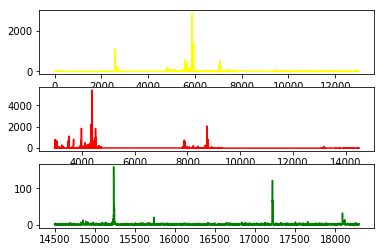

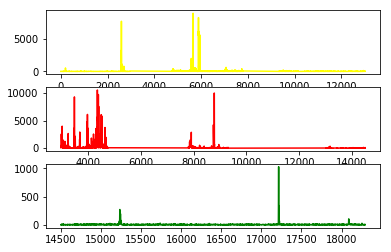

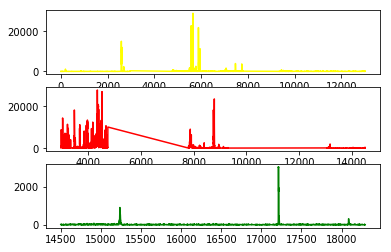

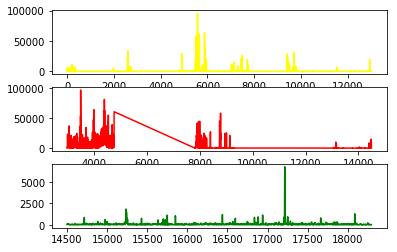

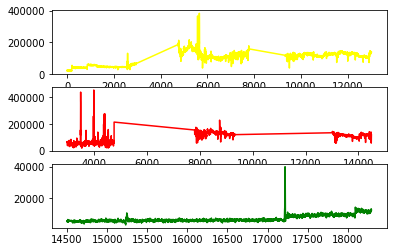

In [21]:
% run plotSIG.ipynb

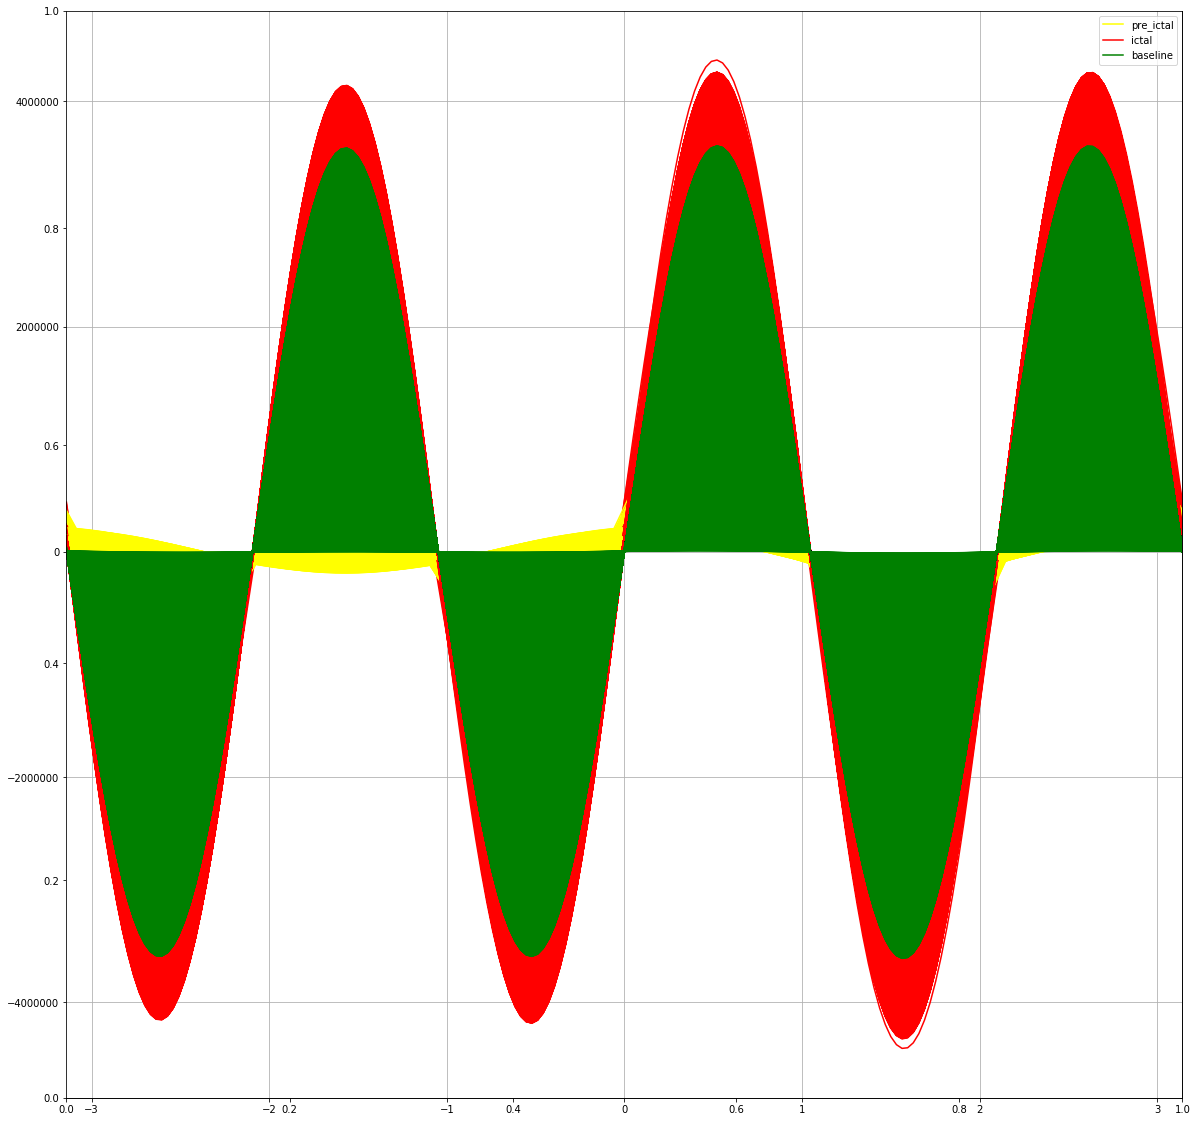

In [22]:
% run plotEDA.ipynb

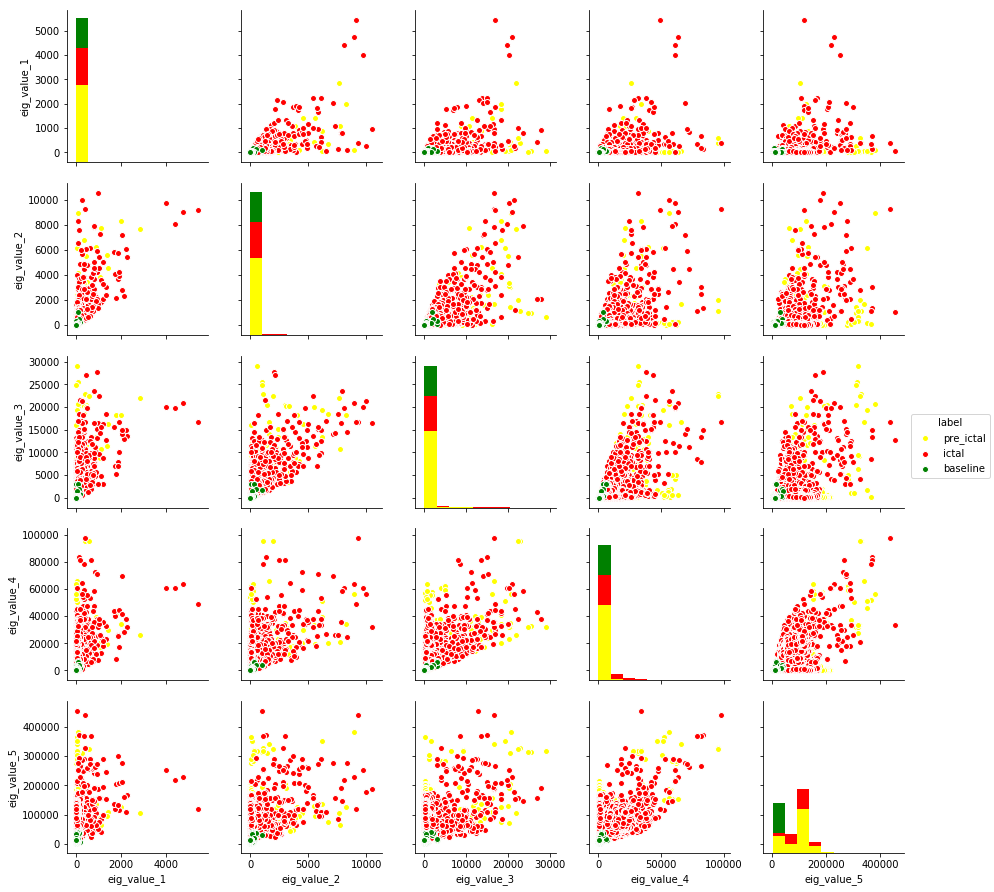

In [23]:
% run plotPAIR.ipynb

{'pre_ictal': 'yellow', 'baseline': 'green', 'ictal': 'red'}
0


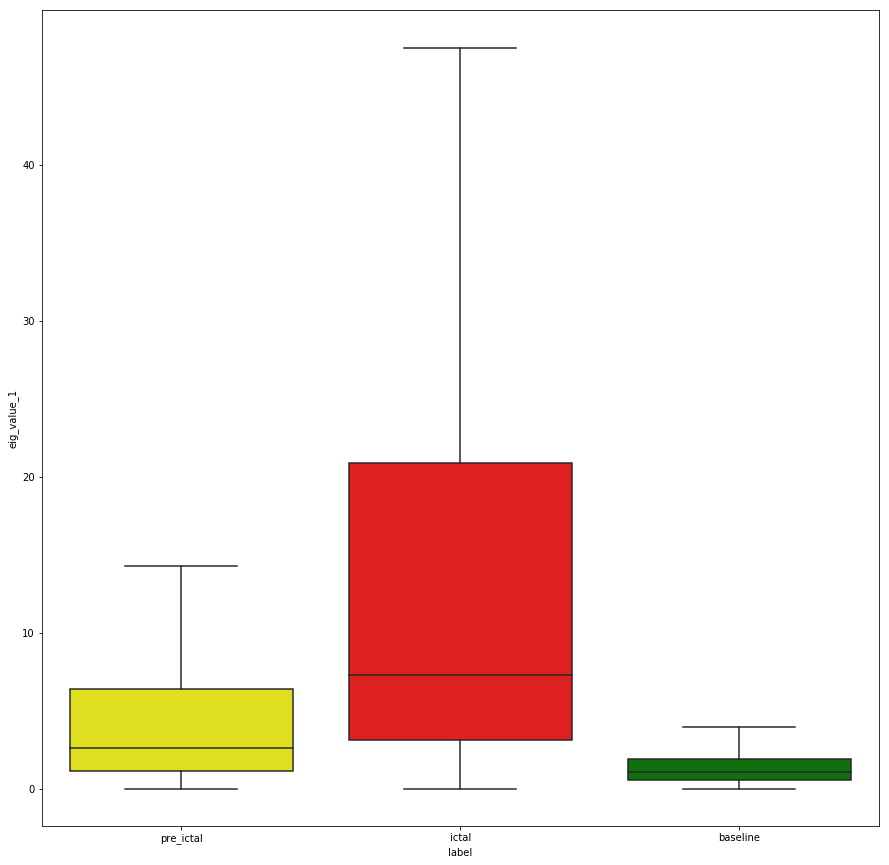

1


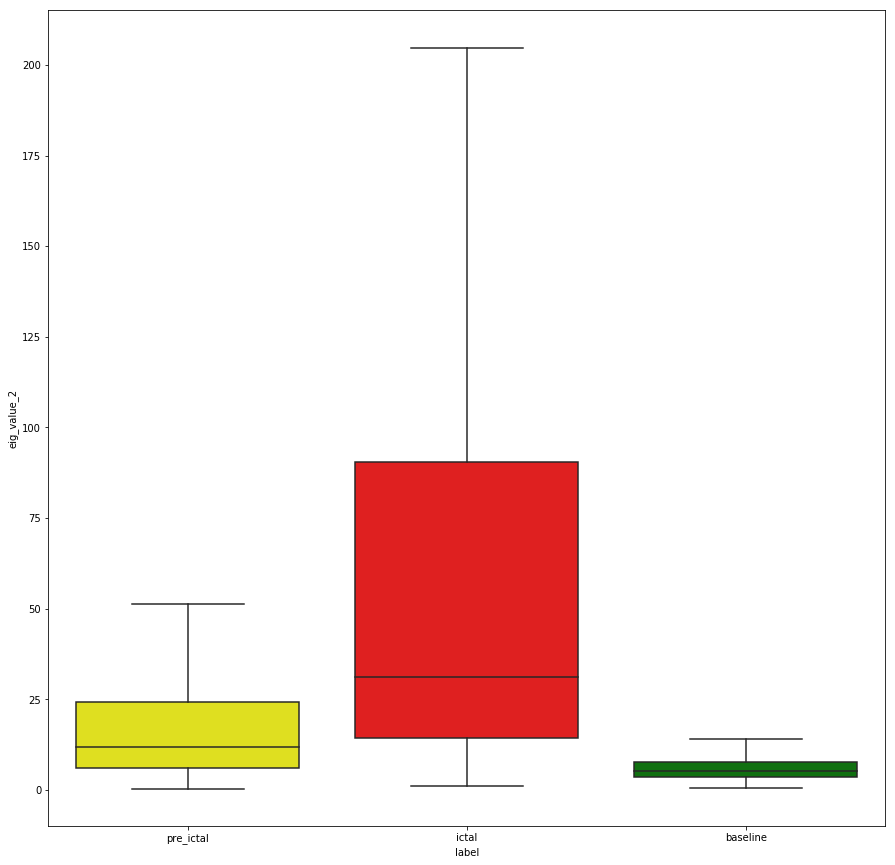

2


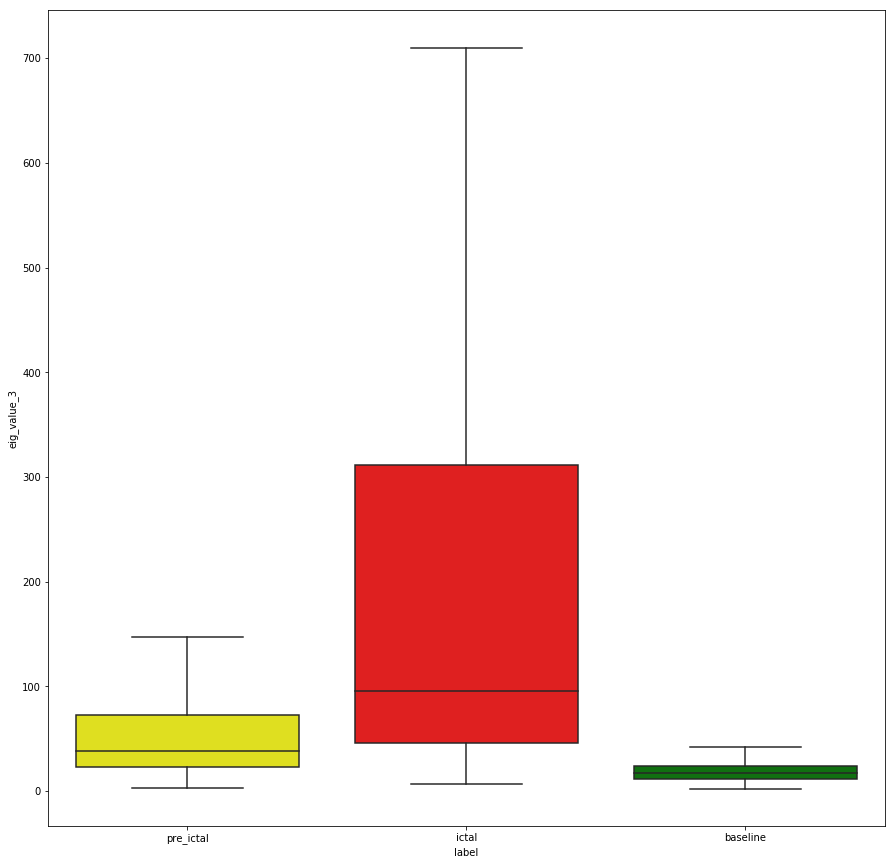

3


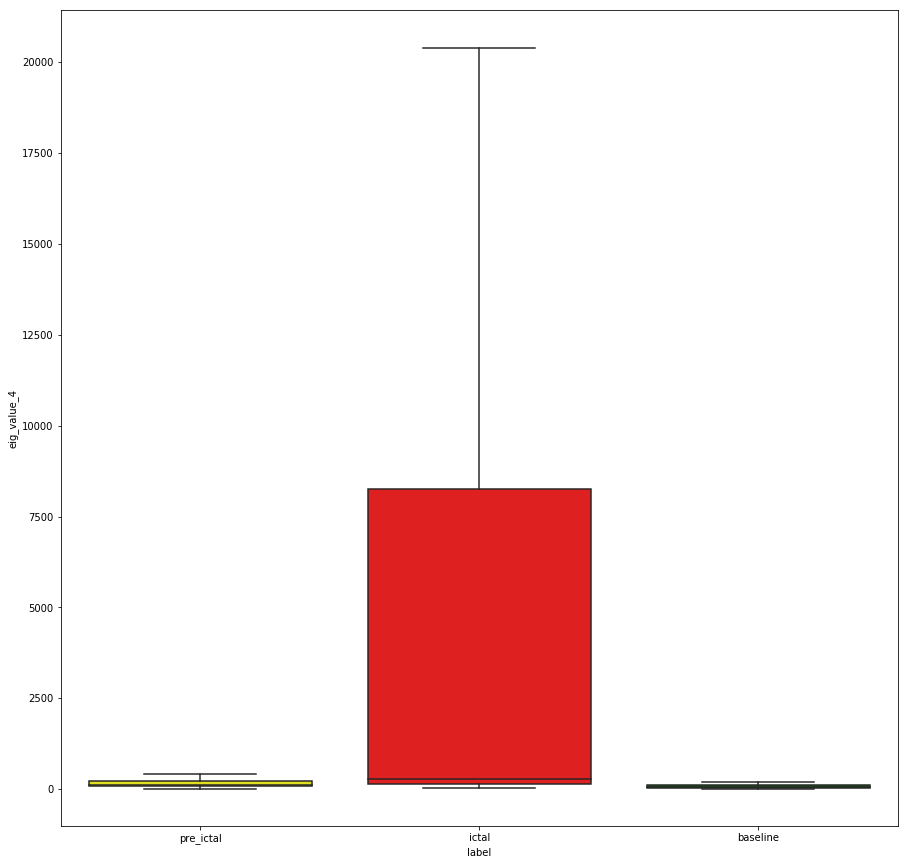

4


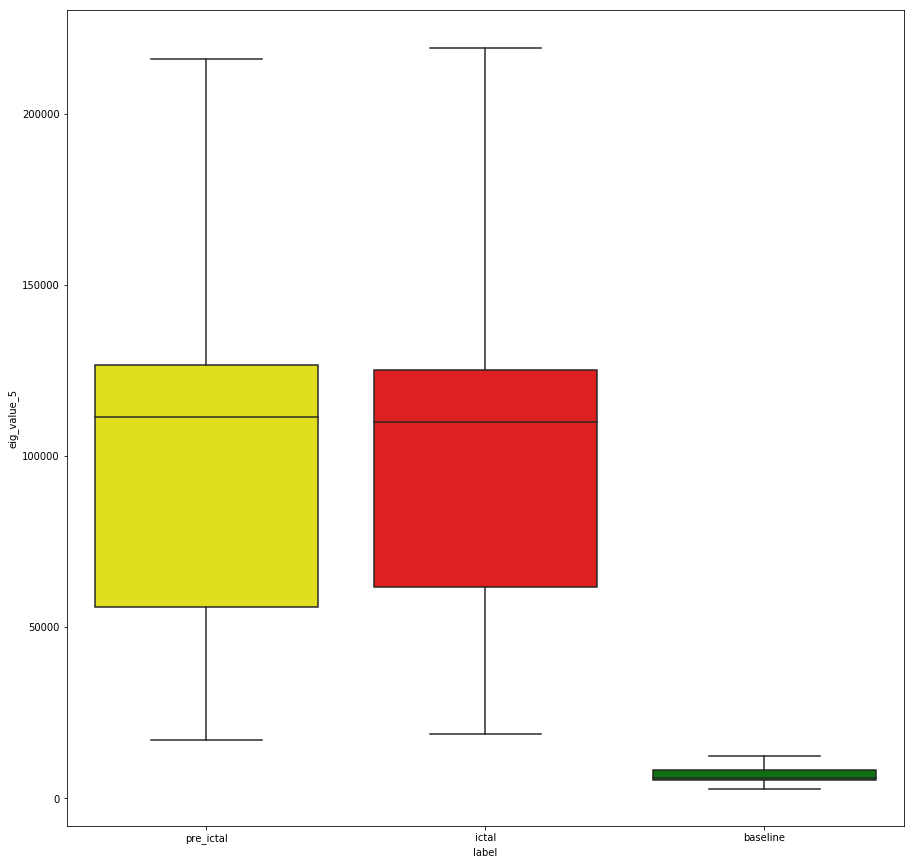

5


ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [24]:
%run plotBOX.ipynb


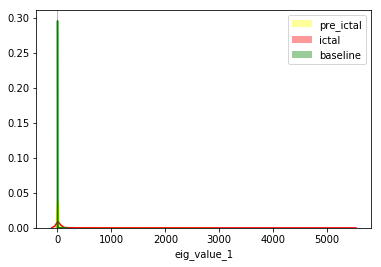

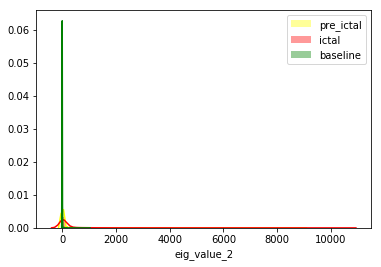

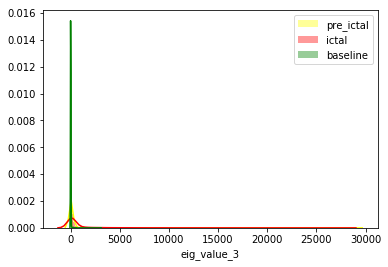

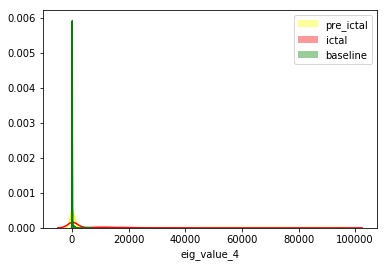

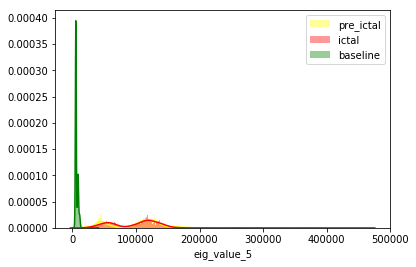

In [25]:
% run plotHIST.ipynb